# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [1]:
!pip3 install seaborn

  Could not fetch URL https://pypi.python.org/simple/seaborn/: There was a problem confirming the ssl certificate: [SSL: TLSV1_ALERT_PROTOCOL_VERSION] tlsv1 alert protocol version (_ssl.c:645) - skipping
  Could not find a version that satisfies the requirement seaborn (from versions: )
No matching distribution found for seaborn


## This cell automatically downloads Capital Bikeshare data

In [9]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('2016-Q1-Trips-History-Data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [16]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

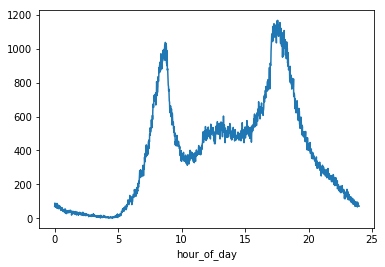

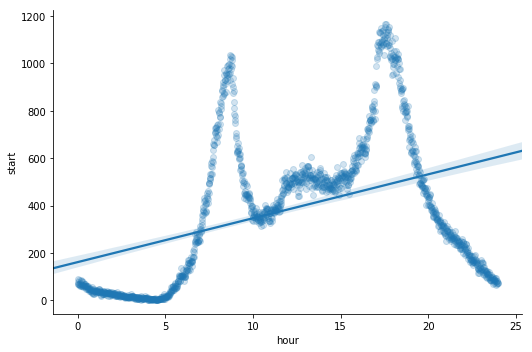

In [9]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
import seaborn as sns
sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

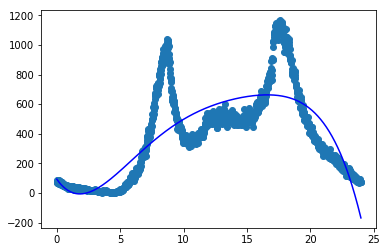

In [77]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

x = hours[['hour']]
y = hours.start

poly5 = PolynomialFeatures(degree=5)
x_5 = poly5.fit_transform(x)
#poly10 = PolynomialFeatures(degree=10)
#x_10 = poly10.fit_transform(x)
#poly15 = PolynomialFeatures(degree=15)
#x_15 = poly15.fit_transform(x)

plt.scatter(x,y)
plt.plot(x, np.dot(x_5, linear.coef_) + linear.intercept_, c='b')
#plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='r')
#plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='g')


## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


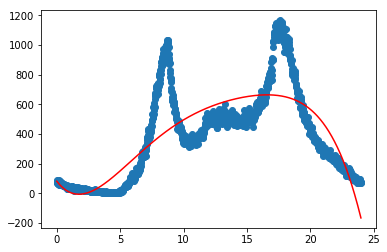

In [74]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

x = hours[['hour']]
y = hours.start

poly5 = PolynomialFeatures(degree=5)
x_5 = poly5.fit_transform(x)


#ridge = linear_model.Ridge(alpha=.5)
#ridge = linear_model.Ridge(alpha=1)
ridge = linear_model.Ridge(alpha=5)

ridge.fit(x_5, y)

plt.scatter(x,y)
plt.plot(x, np.dot(x_5, ridge.coef_) + ridge.intercept_, c='r')